# Đọc file CSV

 **File dữ liệu chưa chuẩn hóa**

In [ ]:
from IPython.display import display
import pandas as pd
data = pd.read_csv('./data_pre.csv')
display(data.head(5))

,Time,Location,MaxTemperature,AvgTemperature,MinTemperature,MaxDewPoint,AvgDewPoint,MinDewPoint,MaxHumidity,AvgHumidity,MinHumidity,MaxWindspeed,AvgWindspeed,MinWindspeed
0,2021-1-1,HoChiMinh,30.0,25.2,23.0,17.0,16.2,16.0,65,57.2,45,12,7.3,5
1,2021-1-2,HoChiMinh,31.0,25.8,22.0,19.0,17.2,16.0,73,59.5,45,12,6.5,2
2,2021-1-3,HoChiMinh,32.0,26.9,22.0,23.0,19.9,17.0,83,67.0,46,7,4.1,0
3,2021-1-4,HoChiMinh,33.0,27.8,24.0,25.0,21.2,18.0,94,70.0,41,10,4.6,1
4,2021-1-5,HoChiMinh,32.0,27.6,24.0,25.0,21.9,19.0,89,72.3,46,9,4.0,1


**File chuẩn hoá dữ liệu**


In [ ]:
df_normal = pd.read_csv('./DataNormal_Maxtemp.csv')
display(df_normal)

,MaxTemperature,AvgTemperature,MinTemperature
0,0.272727,0.208791,0.454545
1,0.363636,0.274725,0.363636
2,0.454545,0.395604,0.363636
3,0.545455,0.494505,0.545455
4,0.454545,0.472527,0.545455
...,...,...,...
876,0.454545,0.351648,0.454545
877,0.454545,0.483516,0.636364
878,0.636364,0.615385,0.818182
879,0.636364,0.670330,0.727273


In [ ]:
df_normal[:10]

,MaxTemperature,AvgTemperature,MinTemperature
0,0.272727,0.208791,0.454545
1,0.363636,0.274725,0.363636
2,0.454545,0.395604,0.363636
3,0.545455,0.494505,0.545455
4,0.454545,0.472527,0.545455
5,0.454545,0.505495,0.545455
6,0.636364,0.538462,0.545455
7,0.636364,0.483516,0.545455
8,0.545455,0.428571,0.454545
9,0.363636,0.296703,0.272727


# Mô hình LSTM cho dự đoán MaxTemperature

## Xây dựng và huấn luyện mô hình

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Chọn biến
features = ['MaxTemperature','AvgTemperature','MinTemperature']
data_features = df_normal[features].values

# Chọn window
window_size = 7
X_train, y_train = [], []

for i in range(len(data_features) - window_size):
    X_train.append(data_features[i:i + window_size])
    y_train.append(data_features[i + window_size])

X_train = np.array(X_train)
y_train = np.array(y_train)

# Phân chia tập train với test
split_index = int(0.8 * len(X_train))

X_train, X_test = X_train[:split_index], X_train[split_index:]
y_train, y_test = y_train[:split_index], y_train[split_index:]

# Reshape dữ liệu cho mô hình LSTM
X_train = X_train.reshape((X_train.shape[0], window_size, X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], window_size, X_test.shape[2]))

In [ ]:
X_train[:5]

array([[[0.27272727, 0.20879121, 0.45454545],
        [0.36363636, 0.27472527, 0.36363636],
        [0.45454545, 0.3956044 , 0.36363636],
        [0.54545455, 0.49450549, 0.54545455],
        [0.45454545, 0.47252747, 0.54545455],
        [0.45454545, 0.50549451, 0.54545455],
        [0.63636364, 0.53846154, 0.54545455]],

       [[0.36363636, 0.27472527, 0.36363636],
        [0.45454545, 0.3956044 , 0.36363636],
        [0.54545455, 0.49450549, 0.54545455],
        [0.45454545, 0.47252747, 0.54545455],
        [0.45454545, 0.50549451, 0.54545455],
        [0.63636364, 0.53846154, 0.54545455],
        [0.63636364, 0.48351648, 0.54545455]],

       [[0.45454545, 0.3956044 , 0.36363636],
        [0.54545455, 0.49450549, 0.54545455],
        [0.45454545, 0.47252747, 0.54545455],
        [0.45454545, 0.50549451, 0.54545455],
        [0.63636364, 0.53846154, 0.54545455],
        [0.63636364, 0.48351648, 0.54545455],
        [0.54545455, 0.42857143, 0.45454545]],

       [[0.54545455, 0.49450

In [ ]:
y_train[:5]

array([[0.63636364, 0.48351648, 0.54545455],
       [0.54545455, 0.42857143, 0.45454545],
       [0.36363636, 0.2967033 , 0.27272727],
       [0.45454545, 0.34065934, 0.36363636],
       [0.36363636, 0.20879121, 0.27272727]])

In [ ]:
# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64))
model.add(Dense(24))
model.add(Dense(len(features)))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 7, 128)            67584     
                                                                 
 lstm_23 (LSTM)              (None, 64)                49408     
                                                                 
 dense_22 (Dense)            (None, 24)                1560      
                                                                 
 dense_23 (Dense)            (None, 3)                 75        
                                                                 
Total params: 118,627
Trainable params: 118,627
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
22/22 [==============================] - 4s 6ms/step - loss: 0.0863
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0176
Epoch 3/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0147
Epoch 4/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0144
Epoch 5/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0143
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0143
Epoch 7/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0141
Epoch 8/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0145
Epoch 9/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0139
Epoch 10/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0139
Epoch 11/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0141
Epoch 12/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0138
Epoch 13/100
22/22 [=================

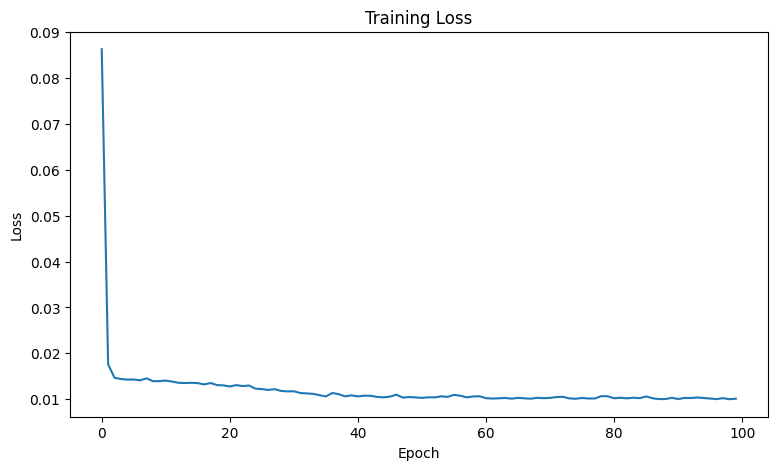

In [ ]:
# Vẽ biểu đồ
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

## Đánh giá mô hình

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

6/6 [==============================] - 0s 3ms/step
Mean Absolute Error (MAE): 0.07814247756792374
Mean Squared Error (MSE): 0.009658233496538472
R2 Score: 0.7024006790919723


In [ ]:
# Lưu kết quả vào file
results_text = f"Mean Absolute Error (MAE): {mae}\n" \
               f"Mean Squared Error (MSE): {mse}\n" \
               f"R2 Score: {r2}\n"

with open("Result_MaxTempLSTM.txt", "w") as file:
    file.write(results_text)

## Vẽ biểu đồ với dữ liệu đã chuẩn hoá

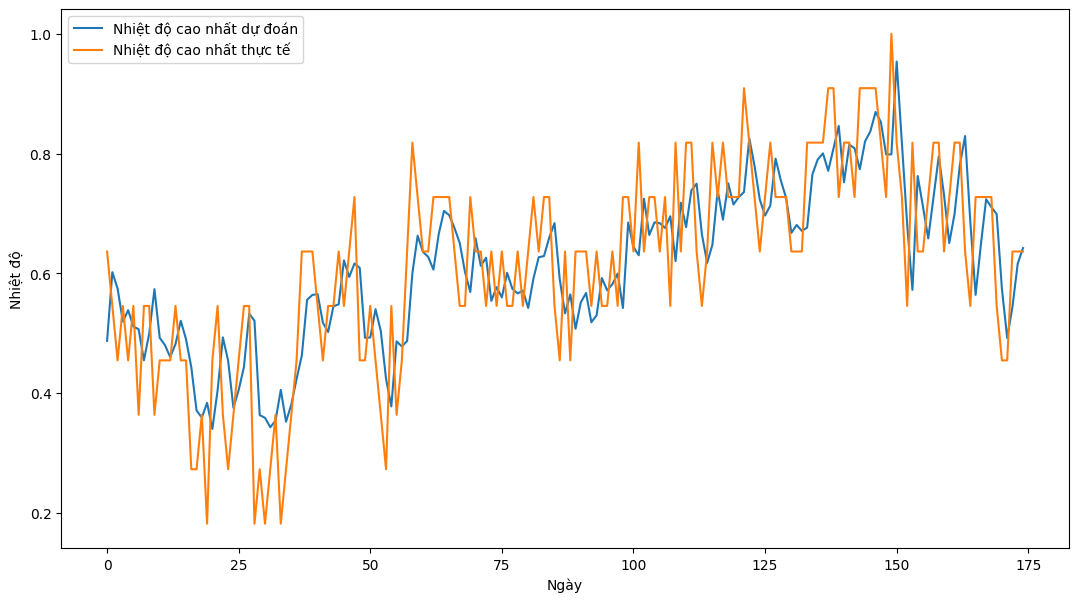

In [ ]:
# Vẽ biểu đồ
plt.figure(figsize=(13, 7))
plt.plot(y_pred[:,0], label='Nhiệt độ cao nhất dự đoán')
plt.plot(y_test[:,0], label='Nhiệt độ cao nhất thực tế')
plt.xlabel('Ngày')
plt.ylabel('Nhiệt độ')
plt.legend()
plt.show()

## Vẽ biểu đồ với dữ liệu gốc

*Chuyển đổi dữ liệu dự đoán về dữ liệu gốc*



In [ ]:
# Dữ liệu dự đoán
import sklearn
convert = sklearn.preprocessing.MinMaxScaler()
data_maxtemp = data['MaxTemperature'].values.reshape(-1,1)
convert.fit_transform(data_maxtemp)

# Chuyển đổi dữ liệu
y_pred_original = convert.inverse_transform(y_pred)

print("Dữ liệu dự đoán gốc")
y_pred_original[:10]

Dữ liệu dự đoán gốc


array([[32.358303, 31.98853 , 33.002216],
       [33.621017, 33.162373, 33.873676],
       [33.318417, 32.851116, 33.58551 ],
       [32.712513, 32.266983, 33.17257 ],
       [32.922424, 32.487946, 33.358406],
       [32.622093, 32.048004, 32.855915],
       [32.572014, 31.691181, 32.260624],
       [32.001545, 31.378027, 32.25966 ],
       [32.491028, 31.716097, 32.342564],
       [33.30801 , 32.96901 , 33.692024]], dtype=float32)

In [ ]:
y_original = convert.inverse_transform(y_test)
print("Dữ liệu thực tế gốc")
y_original[:10]

Dữ liệu thực tế gốc


array([[34.        , 33.40659341, 33.        ],
       [33.        , 32.92307692, 34.        ],
       [32.        , 32.1978022 , 33.        ],
       [33.        , 32.31868132, 33.        ],
       [32.        , 31.95604396, 32.        ],
       [33.        , 31.35164835, 31.        ],
       [31.        , 30.98901099, 32.        ],
       [33.        , 31.71428571, 31.        ],
       [33.        , 33.64835165, 34.        ],
       [31.        , 32.68131868, 34.        ]])

In [ ]:
# Lưu file
df = pd.DataFrame({
    'Pre Maxtemp': y_pred_original[:,0].flatten(),
    'Act MaxTemp': y_original[:,0].flatten()
})

# Lưu DataFrame vào tệp
df.to_csv('Chart_MaxLSTM.csv', index=False)

Vẽ biểu đồ so sánh dữ liệu dự đoán với dữ liệu thực tế

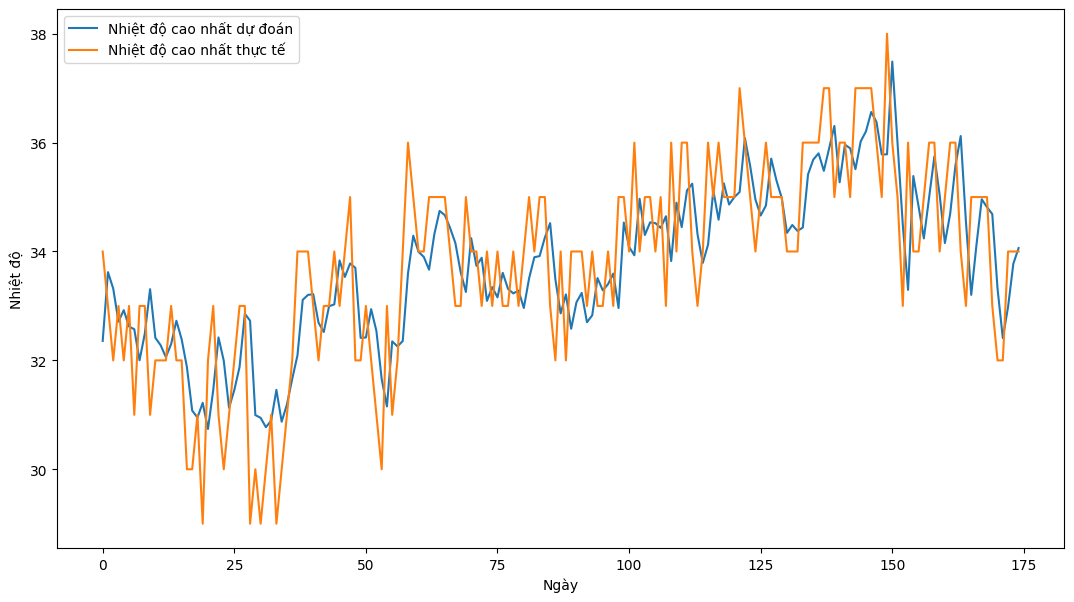

In [ ]:
# Vẽ biểu đồ
plt.figure(figsize=(13, 7))
plt.plot(y_pred_original[:,0], label='Nhiệt độ cao nhất dự đoán')
plt.plot(y_original[:,0], label='Nhiệt độ cao nhất thực tế')
plt.xlabel('Ngày')
plt.ylabel('Nhiệt độ')
plt.legend()
plt.show()